## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 232s 5ms/step - loss: 2.2690 - acc: 0.1524 - val_loss: 2.2190 - val_acc: 0.1989
Epoch 2/500
50000/50000 [==============================] - 224s 4ms/step - loss: 2.1900 - acc: 0.2234 - val_loss: 2.1592 - val_acc: 0.2456
Epoch 3/500
50000/50000 [==============================] - 225s 4ms/step - loss: 2.1342 - acc: 0.2559 - val_loss: 2.1076 - val_acc: 0.2649
Epoch 4/500
50000/50000 [==============================] - 272s 5ms/step - loss: 2.0861 - acc: 0.2742 - val_loss: 2.0636 - val_acc: 0.2809
Epoch 5/500
50000/50000 [==============================] - 314s 6ms/step - loss: 2.0460 - acc: 0.2879 - val_loss: 2.0286 - val_acc: 0.2942
Epoch 6/500
50000/50000 [==============================] - 292s 6ms/step - loss: 2.0135 - acc: 0.2978 - val_loss: 2.0003 - val_acc: 0.3049
Epoch 7/500
50000/50000 [==============================] - 256s 5ms/

50000/50000 [==============================] - 236s 5ms/step - loss: 1.6504 - acc: 0.4279 - val_loss: 1.6632 - val_acc: 0.4235
Epoch 58/500
50000/50000 [==============================] - 236s 5ms/step - loss: 1.6472 - acc: 0.4297 - val_loss: 1.6568 - val_acc: 0.4219
Epoch 59/500
50000/50000 [==============================] - 236s 5ms/step - loss: 1.6440 - acc: 0.4314 - val_loss: 1.6541 - val_acc: 0.4276
Epoch 60/500
50000/50000 [==============================] - 236s 5ms/step - loss: 1.6410 - acc: 0.4330 - val_loss: 1.6506 - val_acc: 0.4244
Epoch 61/500
50000/50000 [==============================] - 242s 5ms/step - loss: 1.6383 - acc: 0.4328 - val_loss: 1.6489 - val_acc: 0.4276
Epoch 62/500
50000/50000 [==============================] - 236s 5ms/step - loss: 1.6351 - acc: 0.4335 - val_loss: 1.6446 - val_acc: 0.4292
Epoch 63/500
50000/50000 [==============================] - 236s 5ms/step - loss: 1.6321 - acc: 0.4339 - val_loss: 1.6428 - val_acc: 0.4253
Epoch 64/500
50000/50000 [=======

50000/50000 [==============================] - 225s 4ms/step - loss: 1.5111 - acc: 0.4746 - val_loss: 1.5448 - val_acc: 0.4561
Epoch 116/500
50000/50000 [==============================] - 218s 4ms/step - loss: 1.5092 - acc: 0.4754 - val_loss: 1.5408 - val_acc: 0.4588
Epoch 117/500
50000/50000 [==============================] - 238s 5ms/step - loss: 1.5075 - acc: 0.4757 - val_loss: 1.5421 - val_acc: 0.4595
Epoch 118/500
50000/50000 [==============================] - 254s 5ms/step - loss: 1.5057 - acc: 0.4768 - val_loss: 1.5447 - val_acc: 0.4611
Epoch 119/500
50000/50000 [==============================] - 227s 5ms/step - loss: 1.5038 - acc: 0.4788 - val_loss: 1.5357 - val_acc: 0.4589
Epoch 120/500
50000/50000 [==============================] - 231s 5ms/step - loss: 1.5021 - acc: 0.4780 - val_loss: 1.5344 - val_acc: 0.4612
Epoch 121/500
50000/50000 [==============================] - 238s 5ms/step - loss: 1.4998 - acc: 0.4791 - val_loss: 1.5335 - val_acc: 0.4598
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 235s 5ms/step - loss: 1.4150 - acc: 0.5076 - val_loss: 1.4754 - val_acc: 0.4784
Epoch 174/500
50000/50000 [==============================] - 234s 5ms/step - loss: 1.4130 - acc: 0.5080 - val_loss: 1.4750 - val_acc: 0.4781
Epoch 175/500
50000/50000 [==============================] - 232s 5ms/step - loss: 1.4116 - acc: 0.5100 - val_loss: 1.4684 - val_acc: 0.4834
Epoch 176/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.4099 - acc: 0.5096 - val_loss: 1.4701 - val_acc: 0.4818
Epoch 177/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.4082 - acc: 0.5103 - val_loss: 1.4684 - val_acc: 0.4826
Epoch 178/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.4066 - acc: 0.5105 - val_loss: 1.4714 - val_acc: 0.4801
Epoch 179/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.4055 - acc: 0.5104 - val_loss: 1.4743 - val_acc: 0.4767
Epoch 180/500
50000/50000 [

50000/50000 [==============================] - 233s 5ms/step - loss: 1.3302 - acc: 0.5357 - val_loss: 1.4247 - val_acc: 0.4967
Epoch 232/500
50000/50000 [==============================] - 244s 5ms/step - loss: 1.3291 - acc: 0.5380 - val_loss: 1.4204 - val_acc: 0.4954
Epoch 233/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.3281 - acc: 0.5382 - val_loss: 1.4165 - val_acc: 0.4995
Epoch 234/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.3269 - acc: 0.5378 - val_loss: 1.4293 - val_acc: 0.4941
Epoch 235/500
50000/50000 [==============================] - 232s 5ms/step - loss: 1.3258 - acc: 0.5385 - val_loss: 1.4185 - val_acc: 0.4966
Epoch 236/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.3239 - acc: 0.5381 - val_loss: 1.4208 - val_acc: 0.4924
Epoch 237/500
50000/50000 [==============================] - 231s 5ms/step - loss: 1.3229 - acc: 0.5398 - val_loss: 1.4165 - val_acc: 0.5017
Epoch 238/500
50000/50000 [

50000/50000 [==============================] - 220s 4ms/step - loss: 1.2572 - acc: 0.5629 - val_loss: 1.3816 - val_acc: 0.5134
Epoch 290/500
50000/50000 [==============================] - 223s 4ms/step - loss: 1.2555 - acc: 0.5616 - val_loss: 1.4017 - val_acc: 0.5058
Epoch 291/500
50000/50000 [==============================] - 220s 4ms/step - loss: 1.2542 - acc: 0.5623 - val_loss: 1.3772 - val_acc: 0.5115
Epoch 292/500
50000/50000 [==============================] - 218s 4ms/step - loss: 1.2525 - acc: 0.5638 - val_loss: 1.3881 - val_acc: 0.5051
Epoch 293/500
50000/50000 [==============================] - 218s 4ms/step - loss: 1.2518 - acc: 0.5639 - val_loss: 1.4036 - val_acc: 0.5014
Epoch 294/500
50000/50000 [==============================] - 220s 4ms/step - loss: 1.2505 - acc: 0.5639 - val_loss: 1.3786 - val_acc: 0.5130
Epoch 295/500
50000/50000 [==============================] - 221s 4ms/step - loss: 1.2492 - acc: 0.5644 - val_loss: 1.3821 - val_acc: 0.5096
Epoch 296/500
50000/50000 [

50000/50000 [==============================] - 232s 5ms/step - loss: 1.1890 - acc: 0.5854 - val_loss: 1.3892 - val_acc: 0.5058
Epoch 348/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.1886 - acc: 0.5871 - val_loss: 1.3566 - val_acc: 0.5191
Epoch 349/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.1871 - acc: 0.5867 - val_loss: 1.3729 - val_acc: 0.5153
Epoch 350/500
50000/50000 [==============================] - 231s 5ms/step - loss: 1.1867 - acc: 0.5869 - val_loss: 1.3700 - val_acc: 0.5125
Epoch 351/500
50000/50000 [==============================] - 232s 5ms/step - loss: 1.1847 - acc: 0.5877 - val_loss: 1.3578 - val_acc: 0.5216
Epoch 352/500
50000/50000 [==============================] - 232s 5ms/step - loss: 1.1840 - acc: 0.5871 - val_loss: 1.4130 - val_acc: 0.5038
Epoch 353/500
50000/50000 [==============================] - 232s 5ms/step - loss: 1.1820 - acc: 0.5879 - val_loss: 1.3552 - val_acc: 0.5194
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 290s 6ms/step - loss: 1.1265 - acc: 0.6095 - val_loss: 1.3650 - val_acc: 0.5186
Epoch 406/500
50000/50000 [==============================] - 234s 5ms/step - loss: 1.1244 - acc: 0.6108 - val_loss: 1.3493 - val_acc: 0.5237
Epoch 407/500
50000/50000 [==============================] - 239s 5ms/step - loss: 1.1250 - acc: 0.6116 - val_loss: 1.4017 - val_acc: 0.5003
Epoch 408/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.1239 - acc: 0.6097 - val_loss: 1.3563 - val_acc: 0.5165
Epoch 409/500
50000/50000 [==============================] - 240s 5ms/step - loss: 1.1217 - acc: 0.6120 - val_loss: 1.3644 - val_acc: 0.5194
Epoch 410/500
50000/50000 [==============================] - 232s 5ms/step - loss: 1.1216 - acc: 0.6095 - val_loss: 1.3498 - val_acc: 0.5216
Epoch 411/500
50000/50000 [==============================] - 233s 5ms/step - loss: 1.1202 - acc: 0.6112 - val_loss: 1.3577 - val_acc: 0.5163
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 240s 5ms/step - loss: 1.0636 - acc: 0.6321 - val_loss: 1.3866 - val_acc: 0.5148
Epoch 464/500
50000/50000 [==============================] - 238s 5ms/step - loss: 1.0629 - acc: 0.6315 - val_loss: 1.3652 - val_acc: 0.5217
Epoch 465/500
50000/50000 [==============================] - 239s 5ms/step - loss: 1.0628 - acc: 0.6320 - val_loss: 1.3333 - val_acc: 0.5269
Epoch 466/500
50000/50000 [==============================] - 239s 5ms/step - loss: 1.0616 - acc: 0.6324 - val_loss: 1.3709 - val_acc: 0.5171
Epoch 467/500
50000/50000 [==============================] - 239s 5ms/step - loss: 1.0628 - acc: 0.6317 - val_loss: 1.3293 - val_acc: 0.5306
Epoch 468/500
50000/50000 [==============================] - 240s 5ms/step - loss: 1.0587 - acc: 0.6343 - val_loss: 1.3460 - val_acc: 0.5220
Epoch 469/500
50000/50000 [==============================] - 238s 5ms/step - loss: 1.0588 - acc: 0.6340 - val_loss: 1.3657 - val_acc: 0.5153
Epoch 470/500
50000/50000 [

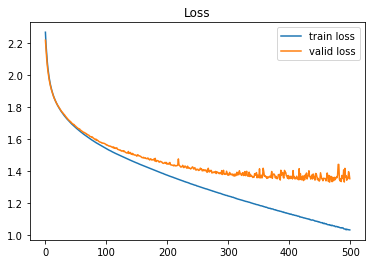

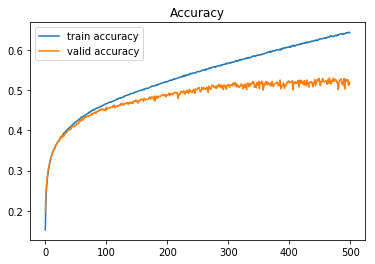

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()